<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Monday2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import calendar
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
from sklearn import metrics

In [ ]:
df = pd.read_csv(path)
monday_index = set()

In [ ]:
for i in range(0,len(df),24*60//5):
  date = df.iloc[i]["time"]
  year = int(date[:4])
  month = int(date[5:7])
  day = int(date[8:10])  

  if calendar.weekday(year,month,day) == 0:
    monday_index.add(i)

In [ ]:
all_index = list()
for i in monday_index:
  for j in range(24*60//5):
    all_index.append(i+j)

In [ ]:
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)

In [ ]:
df2.drop(columns="time",axis=1,inplace=True)
cols = list(df2.columns)
arr = np.array(df2)
corr = np.corrcoef(arr,rowvar=False)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.1, criterion='distance')
labels.max()

921

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.15284752279801672

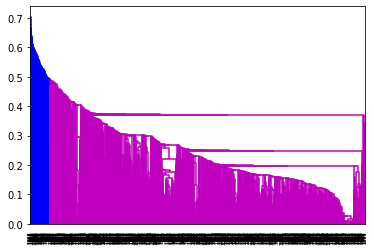

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1465
cluster:2 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.85, criterion='distance')
labels.max()

22

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.02464503691298184

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.02502149466551983

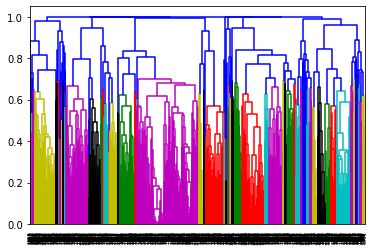

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:12 len:87
cluster:7 len:150
cluster:20 len:164
cluster:17 len:276
cluster:9 len:65
cluster:10 len:354
cluster:21 len:29
cluster:18 len:34
cluster:2 len:116
cluster:8 len:10
cluster:11 len:26
cluster:4 len:12
cluster:14 len:16
cluster:5 len:5
cluster:22 len:34
cluster:6 len:13
cluster:3 len:9
cluster:19 len:41
cluster:15 len:9
cluster:16 len:8
cluster:13 len:5
cluster:1 len:3


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/MondayCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/MondayCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.71, criterion='distance')
labels.max()

32

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

-0.07309043996903819

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

-0.06371510187595479

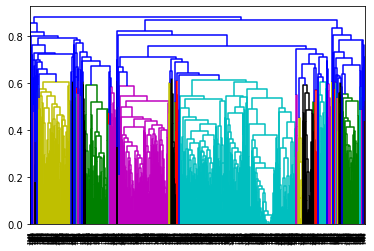

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:20 len:555
cluster:13 len:151
cluster:28 len:121
cluster:6 len:155
cluster:19 len:225
cluster:23 len:60
cluster:12 len:9
cluster:22 len:86
cluster:30 len:3
cluster:32 len:5
cluster:1 len:3
cluster:5 len:15
cluster:10 len:21
cluster:18 len:2
cluster:7 len:13
cluster:3 len:2
cluster:14 len:1
cluster:2 len:2
cluster:24 len:4
cluster:27 len:4
cluster:25 len:3
cluster:17 len:4
cluster:26 len:1
cluster:21 len:10
cluster:29 len:3
cluster:15 len:1
cluster:4 len:1
cluster:8 len:1
cluster:9 len:1
cluster:11 len:1
cluster:31 len:2
cluster:16 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/MondayWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/MondayWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

3

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.11465677828097032

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.13483883128022556

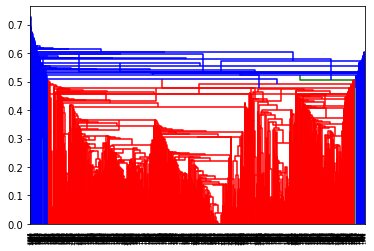

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1464
cluster:3 len:1
cluster:2 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

31

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.044571531326671014

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.05686007958395348

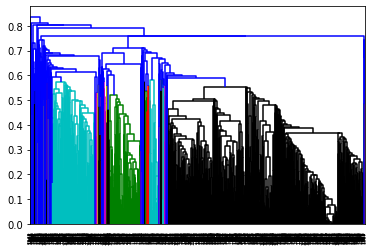

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:28 len:965
cluster:25 len:173
cluster:21 len:250
cluster:15 len:12
cluster:19 len:2
cluster:6 len:12
cluster:5 len:5
cluster:7 len:3
cluster:27 len:2
cluster:18 len:4
cluster:14 len:2
cluster:23 len:1
cluster:20 len:3
cluster:8 len:1
cluster:12 len:2
cluster:10 len:4
cluster:30 len:3
cluster:26 len:5
cluster:11 len:2
cluster:9 len:1
cluster:22 len:1
cluster:29 len:3
cluster:13 len:1
cluster:3 len:1
cluster:16 len:1
cluster:1 len:1
cluster:2 len:1
cluster:17 len:1
cluster:24 len:1
cluster:4 len:2
cluster:31 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/MondayAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/MondayAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()